In [95]:
import pandas as pd 
import numpy as np

In [2]:
fico= pd.read_csv("fico.csv")

In [3]:
region = pd.read_csv("region.csv")

In [4]:
fico.head()

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796


In [5]:
fico.tail()

,acct_id,FICO
100008,99996,NaN
100009,99997,NaN
100010,99998,NaN
100011,99999,SSS
100012,100000,NaN


In [6]:
region.head()

,acct_id,region
0,1,New York
1,2,Dallas
2,3,Los Angeles
3,4,Chicago
4,5,Philadelphia


In [7]:
region.tail()

,acct_id,region
100168,99996,Chicago
100169,99997,New York
100170,99998,San Diego
100171,99999,Chicago
100172,100000,Dallas


In [8]:
fico.shape

(100013, 2)

In [9]:
region.shape

(100173, 2)

In [10]:
fico.isna().sum()

acct_id        0
FICO       29615
dtype: int64

In [11]:
fico['acct_id'].is_unique

False

In [12]:
fico['acct_id'].duplicated(keep="first").value_counts()

False    100000
True         13
Name: acct_id, dtype: int64

In [13]:
region['acct_id'].duplicated(keep='first').value_counts()

False    100000
True        173
Name: acct_id, dtype: int64

In [38]:
region['duplicate']=region['acct_id'].duplicated(keep="first") 

In [39]:
region[region['duplicate']==True]

,acct_id,region,duplicate
27,27,Los Angeles,True
28,27,Dallas,True
2577,2575,Dallas,True
2578,2575,Los Angeles,True
5015,5011,Dallas,True
...,...,...,...
97547,97379,Los Angeles,True
97813,97644,Los Angeles,True
97831,97661,Los Angeles,True
98464,98293,Los Angeles,True


In [47]:
for i in range(len(region['acct_id'])):
    if region.iloc[i,2]==True:
        region.iloc[i,1]="Missing"

In [14]:
fico['duplicate']=fico['acct_id'].duplicated(keep="first")

In [15]:
fico[fico['duplicate']==True]

,acct_id,FICO,duplicate
140,140,752,True
190,189,745,True
192,190,828,True
194,191,752,True
196,192,850,True
30506,30501,773,True
30508,30502,798,True
30510,30503,820,True
30512,30504,NaN,True
30514,30505,820,True


In [48]:
region[region['region']=='Missing']

,acct_id,region,duplicate
27,27,Missing,True
28,27,Missing,True
2577,2575,Missing,True
2578,2575,Missing,True
5015,5011,Missing,True
...,...,...,...
97547,97379,Missing,True
97813,97644,Missing,True
97831,97661,Missing,True
98464,98293,Missing,True


In [16]:
fico['duplicate']=fico['duplicate'].astype("str")

In [17]:
for i in range(len(fico['acct_id'])):
    if fico.iloc[i,2]=='True':
        fico.iloc[i,1]="Missing"

In [18]:
fico[fico['FICO']=='Missing']

,acct_id,FICO,duplicate
140,140,Missing,True
190,189,Missing,True
192,190,Missing,True
194,191,Missing,True
196,192,Missing,True
30506,30501,Missing,True
30508,30502,Missing,True
30510,30503,Missing,True
30512,30504,Missing,True
30514,30505,Missing,True


In [19]:
fico.fillna("Missing",inplace=True)

In [20]:
fico.isna().sum()

acct_id      0
FICO         0
duplicate    0
dtype: int64

In [21]:
for i in range(len(fico['FICO'])):
    if not (fico.iloc[i,1].isdigit() or fico.iloc[i,1]=='Missing'):
        print(fico.iloc[i,1])

AA
SSS


In [22]:
fico[fico['FICO']=='Missing']

,acct_id,FICO,duplicate
10,11,Missing,False
17,18,Missing,False
40,41,Missing,False
42,43,Missing,False
43,44,Missing,False
...,...,...,...
100007,99995,Missing,False
100008,99996,Missing,False
100009,99997,Missing,False
100010,99998,Missing,False


In [23]:
for i in range(len(fico['FICO'])):
    if not (fico.iloc[i,1].isdigit() or fico.iloc[i,1]=='Missing'):
        fico.iloc[i,1]="Missing"

In [24]:
fico[fico['FICO']=='Missing']

,acct_id,FICO,duplicate
10,11,Missing,False
17,18,Missing,False
40,41,Missing,False
42,43,Missing,False
43,44,Missing,False
...,...,...,...
100008,99996,Missing,False
100009,99997,Missing,False
100010,99998,Missing,False
100011,99999,Missing,False


In [25]:
fico.drop(columns="duplicate",axis=1,inplace=True)

In [26]:
fico.tail()

,acct_id,FICO
100008,99996,Missing
100009,99997,Missing
100010,99998,Missing
100011,99999,Missing
100012,100000,Missing


## All rows with eronous data in fico table marked as 'Missing'

In [27]:
fc=fico[fico['FICO']!="Missing"]

In [28]:
fc['FICO']=fc['FICO'].astype('int64')

/var/folders/4f/lb_fqykd0x987743d44v4dt40000gn/T/ipykernel_4651/3361631793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc['FICO']=fc['FICO'].astype('int64')


In [29]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70386 entries, 0 to 100004
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   acct_id  70386 non-null  int64
 1   FICO     70386 non-null  int64
dtypes: int64(2)
memory usage: 1.6 MB


In [55]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70386 entries, 0 to 100004
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   acct_id  70386 non-null  int64   
 1   FICO     70386 non-null  int64   
 2   binned   70385 non-null  category
dtypes: category(1), int64(2)
memory usage: 1.7 MB


In [31]:
min(fc["FICO"])

420

In [32]:
max(fc["FICO"])

850

In [111]:
bins=[min(fc["FICO"])-1,580,670,740,800,max(fc["FICO"])]
labels=['Poor','Fair','Good','Very Good','Exceptional']

In [112]:
fc['binned']=pd.cut(fc['FICO'],bins=bins,labels=labels)

/var/folders/4f/lb_fqykd0x987743d44v4dt40000gn/T/ipykernel_4651/1461731626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc['binned']=pd.cut(fc['FICO'],bins=bins,labels=labels)


In [113]:
fc.head()

,acct_id,FICO,binned
0,1,768,Very Good
1,2,850,Exceptional
2,3,677,Good
3,4,843,Exceptional
4,5,796,Very Good


In [114]:
fc['binned'].value_counts()

Exceptional    36583
Very Good      18418
Good           11117
Fair            3505
Poor             763
Name: binned, dtype: int64

<AxesSubplot:>

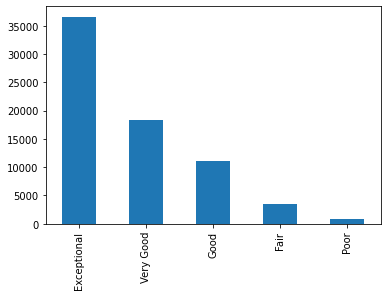

In [115]:
fc['binned'].value_counts().plot(kind='bar')

In [116]:
rg=region[region["region"]!="Missing"]

In [117]:
rg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 100172
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   acct_id    100000 non-null  int64 
 1   region     100000 non-null  object
 2   duplicate  100000 non-null  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 2.4+ MB


In [118]:
rg.drop('duplicate',axis=1,inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [119]:
fc.set_index("acct_id")

,FICO,binned
acct_id,,
1,768,Very Good
2,850,Exceptional
3,677,Good
4,843,Exceptional
5,796,Very Good
...,...,...
99986,836,Exceptional
99987,850,Exceptional
99989,850,Exceptional


In [120]:
rg.set_index('acct_id')

,region
acct_id,
1,New York
2,Dallas
3,Los Angeles
4,Chicago
5,Philadelphia
...,...
99996,Chicago
99997,New York
99998,San Diego


In [121]:
temp=pd.merge(fc,rg,on='acct_id')

In [122]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70386 entries, 0 to 70385
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   acct_id  70386 non-null  int64   
 1   FICO     70386 non-null  int64   
 2   binned   70386 non-null  category
 3   region   70386 non-null  object  
dtypes: category(1), int64(2), object(1)
memory usage: 2.2+ MB


In [123]:
temp.head()

,acct_id,FICO,binned,region
0,1,768,Very Good,New York
1,2,850,Exceptional,Dallas
2,3,677,Good,Los Angeles
3,4,843,Exceptional,Chicago
4,5,796,Very Good,Philadelphia


In [124]:
temp.isna().sum()

acct_id    0
FICO       0
binned     0
region     0
dtype: int64

In [127]:
temp['region'].value_counts()

Dallas          7224
San Antonio     7189
Charlotte       7091
New York        7071
Houston         7065
Phoenix         7014
Philadelphia    6951
San Diego       6946
Chicago         6928
Los Angeles     6907
Name: region, dtype: int64

## Grouping by region 

In [147]:
tg=temp[['region','FICO']].groupby('region').mean()

In [149]:
tg

,FICO
region,
Charlotte,785.154280
Chicago,785.643043
Dallas,783.560078
Houston,786.005803
Los Angeles,789.661792
New York,785.065903
Philadelphia,785.773845
Phoenix,788.170231
San Antonio,784.508277


## Sorting Values in ascending order

In [152]:
tg.sort_values('FICO',inplace=True)

In [164]:
tg

,FICO
region,
Dallas,783.560078
San Diego,784.076447
San Antonio,784.508277
New York,785.065903
Charlotte,785.154280
Chicago,785.643043
Philadelphia,785.773845
Houston,786.005803
Phoenix,788.170231


## Retreiving smallest and second largest values

In [171]:
tg.iloc[[0,-2]]

,FICO
region,
Dallas,783.560078
Phoenix,788.170231
